# TITLE: Clustering and Fitting


STUDENT_ID NO : 23034668


NAME : SRILEKHA EMMA




In [4]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Read the CSV file
data = pd.read_csv(r'C:\Users\dell\OneDrive\Documents\seattle-weather.csv')

# Viewing the top 5 rows of the dataset
print(data.head())



         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


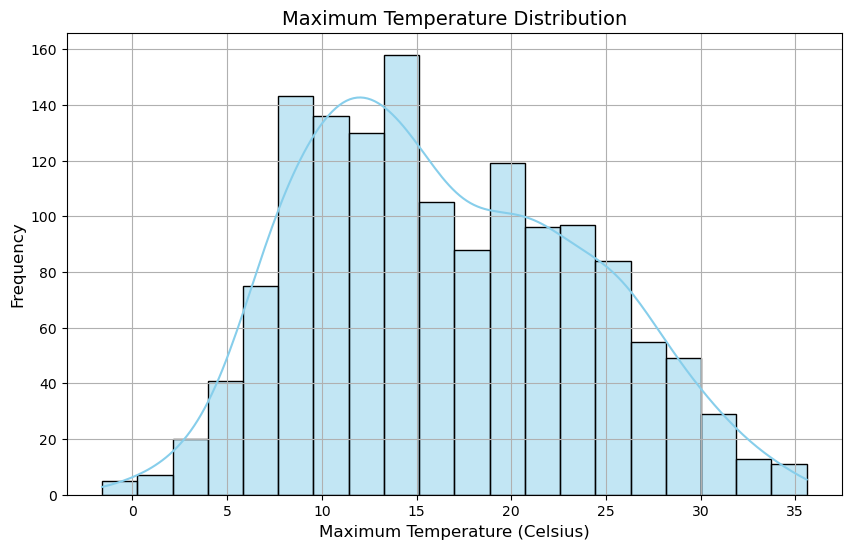

In [16]:
# Function to plot maximum temperature distribution
def plot_temperature(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['temp_max'], bins=20, kde=True, color='skyblue')
    plt.xlabel('Maximum Temperature (Celsius)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Maximum Temperature Distribution', fontsize=14)
    plt.grid(True)
    plt.show()

plot_temperature(data)

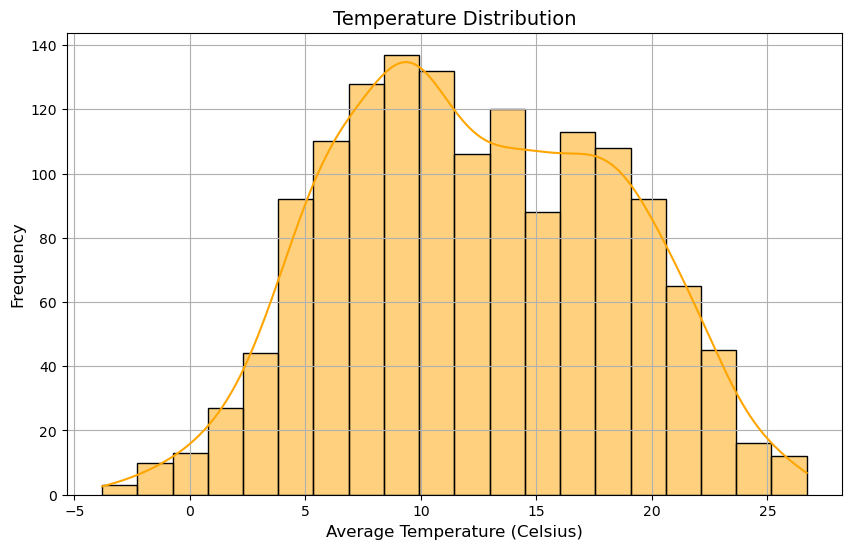

In [21]:
# Creating a new column 'Temperature' as the average of 'temp_max' and 'temp_min'
data['Temperature'] = (data['temp_max'] + data['temp_min']) / 2

def plot_temperature(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Temperature'], bins=20, kde=True, color='orange')
    plt.xlabel('Average Temperature (Celsius)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Temperature Distribution', fontsize=14)
    plt.grid(True)
    plt.show()

plot_temperature(data)

In [38]:
def visualize_clusters(data_scaled, optimal_num_clusters):
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)

    plt.figure(figsize=(8, 5.5))

    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')

    plt.xlabel('Maximum Temperature', fontsize=12)
    plt.ylabel('Minimum Temperature', fontsize=12)
    plt.title('KMeans Clustering', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


note that we need to scale the 'temp_max' and 'temp_min' columns before passing them to the visualize_clusters
function. You can use the StandardScaler from sklearn.preprocessing to scale the data.


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


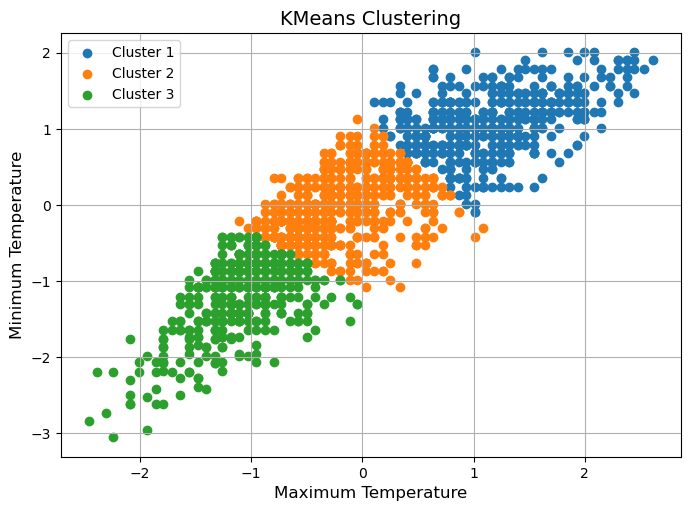

In [26]:
from sklearn.preprocessing import StandardScaler

# Selecting the 'temp_max' and 'temp_min' columns
data_to_scale = data[['temp_max', 'temp_min']]

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

# Visualizing clusters
visualize_clusters(data_scaled, optimal_num_clusters=3)  # Replace 3 with the desired number of clusters

In [40]:
# Preprocessing function to standardize the data
def preprocess_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data[['temp_max', 'temp_min']])
preprocess_data(data)

array([[-0.49529914, -0.64421175],
       [-0.79473121, -1.08234662],
       [-0.64501518, -0.20607688],
       ...,
       [-1.25748987, -1.52048149],
       [-1.47525865, -1.83912504],
       [-1.47525865, -2.05819247]])

In [42]:
# Performing elbow method to determine the optimal number of clusters
def perform_elbow_method(data_scaled):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss, marker='o')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('WCSS', fontsize=12)
    plt.title('Elbow Method', fontsize=14)
    plt.grid(True)
    plt.show()

    # Determine the optimal number of clusters based on the elbow plot
    # and return the value
    # For example, if you determine the optimal number of clusters is 4:
    return 4

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

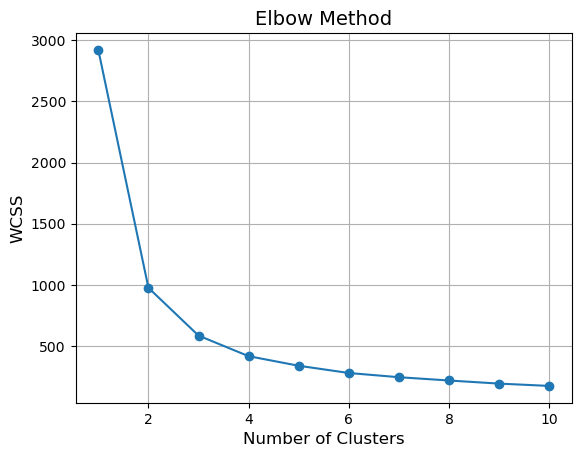

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


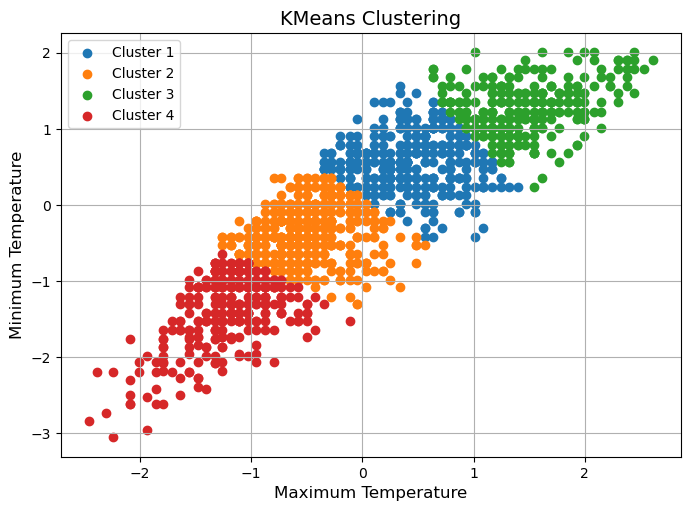

In [33]:
# Preprocessing the data
data_scaled = preprocess_data(data)

# Performing elbow method
optimal_num_clusters = perform_elbow_method(data_scaled)

# Visualize clusters
visualize_clusters(data_scaled, optimal_num_clusters)

In [34]:
# Printing descriptive statistics
description = data.describe()
print(description)


       precipitation     temp_max     temp_min         wind  Temperature
count    1461.000000  1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136    12.336927
std         6.680194     7.349758     5.023004     1.437825     5.998051
min         0.000000    -1.600000    -7.100000     0.400000    -3.800000
25%         0.000000    10.600000     4.400000     2.200000     7.750000
50%         0.000000    15.600000     8.300000     3.000000    11.950000
75%         2.800000    22.200000    12.200000     4.000000    17.200000
max        55.900000    35.600000    18.300000     9.500000    26.700000


In [35]:
# Calculating the correlation matrix
confusion_matrix_1 = data.corr(numeric_only=True)
print(confusion_matrix_1)

               precipitation  temp_max  temp_min      wind  Temperature
precipitation       1.000000 -0.228555 -0.072684  0.328045    -0.170465
temp_max           -0.228555  1.000000  0.875687 -0.164857     0.979346
temp_min           -0.072684  0.875687  1.000000 -0.074185     0.955234
wind                0.328045 -0.164857 -0.074185  1.000000    -0.132067
Temperature        -0.170465  0.979346  0.955234 -0.132067     1.000000


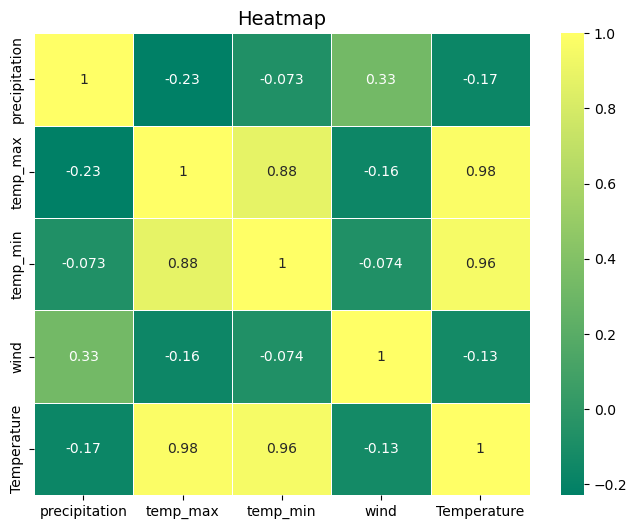

In [44]:
# Plotting heatmap of the correlation matrix
def plot_heatmap(confusion_matrix_1, title='Heatmap of Correlation matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_1, annot=True, cmap='summer', linewidths=0.5, fmt='.2g', linecolor='white')
    plt.title(title, fontsize=14)
    plt.show()
plot_heatmap(confusion_matrix_1, title='Heatmap')


In [45]:
# Calculate the mean for each column
mean_values = data.mean(numeric_only=True)
print("Mean values for each column:")
print(mean_values)


Mean values for each column:
precipitation     3.029432
temp_max         16.439083
temp_min          8.234771
wind              3.241136
Temperature      12.336927
dtype: float64


In [46]:
# Calculate the median for each column
median_values = data.median(numeric_only=True)
print("Median values for each column:")
print(median_values)


Median values for each column:
precipitation     0.00
temp_max         15.60
temp_min          8.30
wind              3.00
Temperature      11.95
dtype: float64


In [48]:
# Calculate the standard deviation for each column
std_values = data.std(numeric_only=True)
print("Standard deviation values for each column:")
print(std_values)

Standard deviation values for each column:
precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
Temperature      5.998051
dtype: float64


In [49]:
 #Calculate the skewness for each column
skew_values = data.skew(numeric_only=True)
print("Skewness values for each column:")
print(skew_values)


Skewness values for each column:
precipitation    3.505644
temp_max         0.280930
temp_min        -0.249459
wind             0.891668
Temperature      0.053671
dtype: float64


In [53]:
# Calculate the kurtosis for each column
kurtosis_values = data.kurtosis(numeric_only=True)
print("Kurtosis values for each column:")
print(kurtosis_values)


Kurtosis values for each column:
precipitation    15.522178
temp_max         -0.690467
temp_min         -0.600573
wind              0.803961
Temperature      -0.734411
dtype: float64


Kurtosis is a statistical measure that describes the shape of a probability distribution, specifically how "heavy" or "light" 
the tails of the distribution are compared to a normal distribution.

The precipitation values have a leptokurtic distribution with heavy tails, indicating a higher probability of extreme
precipitation events. On the other hand, the temperature (maximum, minimum, and average) and wind values have platykurtic
distributions with lighter tails, suggesting a lower probability of observing extreme values for these variables compared to
a normal distribution.
These kurtosis values provide insights into the shape of the distributions and can help guide further analysis or modeling 
decisions. 